# Class Central Survey: compare target group 'Africa' with the rest of the sample

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
sns.set_context("talk")

## Read the survey data

In [2]:
df = pd.read_csv('raw/2016-17-ClassCentral-Survey-data-noUserText.csv', decimal=',', encoding = "ISO-8859-1")

## Create target group 'Latin America'

In [3]:
df['Which region of the world are you in?'].value_counts()

United States                 818
Western Europe (except UK)    287
Africa                        276
India                         219
East & Southeast Asia         200
Eastern Europe                153
Central or South America      147
Canada                        104
United Kingdom                 98
Australia / New Zealand        92
Mexico                         47
Name: Which region of the world are you in?, dtype: int64

In [4]:
target_name = 'Latin America'
mask_africa = (df['Which region of the world are you in?'] == 'Africa')

## Generic function to plot barchart for any categorical feature on any target/nontarget split 

In [5]:
def binary_compare_categorical_barh(mask, feature, df=df,
                                            target_name='target', nontarget_name='Other', 
                                            split_name='visitor', answer='answer'):
    """Split dataframe into two based on mask
    Draw horizontal barcharts for each category item for both masked and unmasked object"""
    target = df[mask]
    nontarget = df[~mask]
    target_size, nontarget_size = len(target), len(nontarget)
    
    res_target = target[feature].value_counts()/target_size*100
    res_nontarget = nontarget[feature].value_counts()/nontarget_size*100
    
    result = pd.DataFrame({target_name: res_target, nontarget_name: res_nontarget})
    result[answer] = result.index
    
    res_df = pd.melt(result, id_vars=answer, var_name=split_name, value_name='percentage')
    print(res_df)
    
    sns.factorplot(x='percentage', y=answer, hue=split_name, data=res_df, kind='bar', orient='h', size=6, aspect=2)
    plt.title(feature)
    sns.despine(left=True, bottom=True)
    plt.show()
    return

## Generic function to plot barchart for any multi-categorical feature on any target/nontarget split

In [6]:
def binary_compare_multi_select_categorical_barh(df, target, target_name, question, selectors, nontarget_name = 'Others'):
    """draw a barchart for Survey results on a question that allows to select multiple categories
    df: dataframe to use
    target: selection of rows based on column values
    question: the question you want to analyse
    selectors: list of df column containing the selectors (values 0/1)"""
    size = {}
    target_df = df[target]
    nontarget_df = df[~target]
    size[target_name], size[nontarget_name] = len(target_df), len(nontarget_df)
    print(size)
    graph_targetdata = target_df.loc[:, selectors]
    graph_targetdata['target'] = target_name
    
    graph_nontargetdata = nontarget_df.loc[:, selectors]
    graph_nontargetdata['target'] = nontarget_name
    
    graph_data = pd.concat([graph_targetdata, graph_nontargetdata])
    
    melted = pd.melt(graph_data, id_vars='target', var_name='select', value_name='percentage')
    grouped = melted.groupby(['target', 'select'], as_index=False).sum()
    #print(size[grouped['target']])
    grouped.percentage = grouped.percentage/grouped['target'].map(size)*100 # make it percentage of total
    grouped['select'] = grouped['select'].apply(lambda x: x.split(": ")[1]) # remove prefix from string
    print(grouped)  
    
    sns.factorplot(x='percentage', y='select', hue='target', data=grouped, kind='bar', orient='h', size=6, aspect=2)
    sns.plt.title(question)
    sns.despine(left=True, bottom=True)
    sns.plt.show()

## Apply this plot on the target 'Africa'

   answer visitor  percentage
0     1.0  Africa   33.695652
1     2.0  Africa   12.681159
2     3.0  Africa   13.043478
3     4.0  Africa   15.942029
4     5.0  Africa   21.376812
5     1.0   Other   19.458239
6     2.0   Other    9.164786
7     3.0   Other   14.627540
8     4.0   Other   23.250564
9     5.0   Other   32.866817


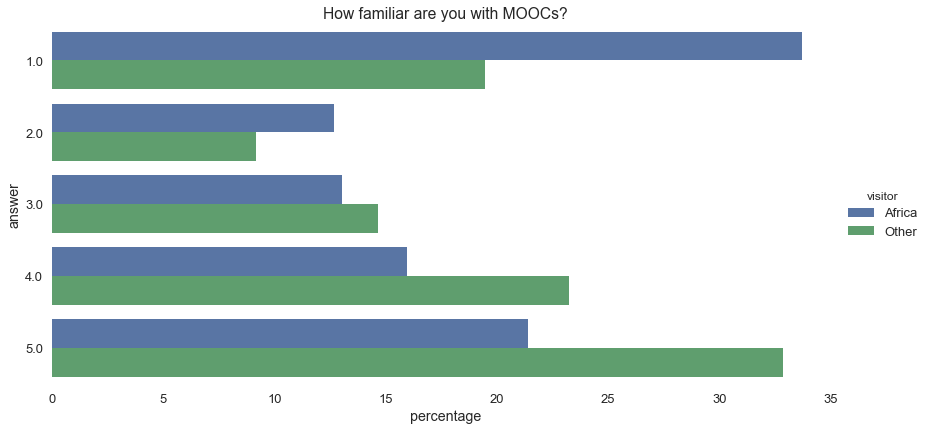

In [7]:
binary_compare_categorical_barh(mask=mask_africa, 
            target_name='Africa', feature='How familiar are you with MOOCs?')

   answer visitor  percentage
0     1.0  Africa    4.710145
1     2.0  Africa    2.536232
2     3.0  Africa   14.855072
3     4.0  Africa   20.652174
4     5.0  Africa   54.710145
5     1.0   Other   19.277652
6     2.0   Other   13.002257
7     3.0   Other   21.670429
8     4.0   Other   20.225734
9     5.0   Other   24.920993


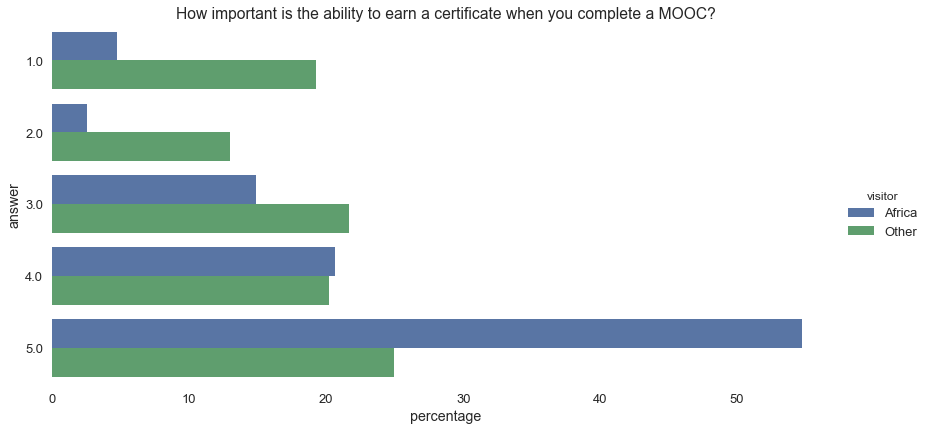

In [8]:
binary_compare_categorical_barh(mask=mask_africa, 
                                        target_name='Africa', feature='How important is the ability to earn a certificate when you complete a MOOC?')

{'Africa': 276, 'Others': 2215}
   target                              select  percentage
0  Africa       Access to reference materials   23.188406
1  Africa  Learning skills for current career   59.420290
2  Africa      Learning skills for new career   56.521739
3  Africa                   Personal interest   53.985507
4  Africa                       School credit   13.768116
5  Others       Access to reference materials   28.577878
6  Others  Learning skills for current career   50.022573
7  Others      Learning skills for new career   46.997743
8  Others                   Personal interest   82.392777
9  Others                       School credit    7.990971


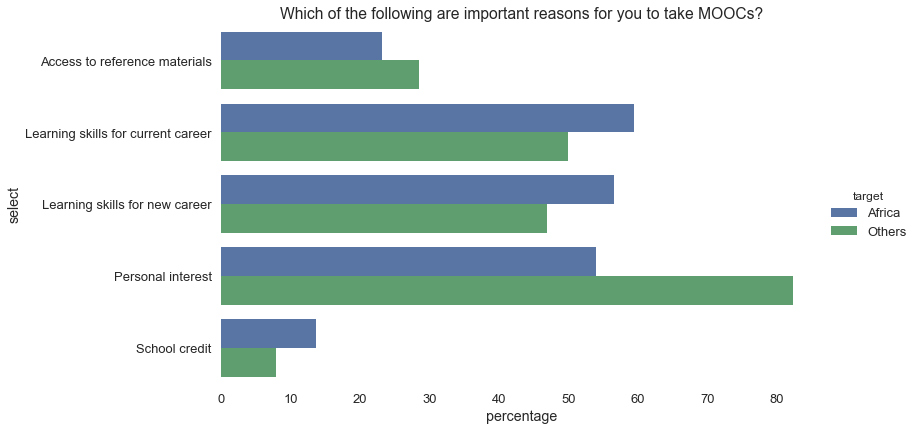

In [9]:
reasons = ['Reasons: Learning skills for current career', 'Reasons: Learning skills for new career', 
           'Reasons: School credit', 'Reasons: Personal interest', 'Reasons: Access to reference materials']
binary_compare_multi_select_categorical_barh(df, target=mask_africa, target_name='Africa',
                question='Which of the following are important reasons for you to take MOOCs?', 
                selectors=reasons)

{'Africa': 276, 'Others': 2215}
    target                  select  percentage
0   Africa  Institution/university   42.753623
1   Africa              Instructor   11.594203
2   Africa  Others recommendations   21.739130
3   Africa                Platform   22.463768
4   Africa                 Ratings   25.724638
5   Africa           Topic/Subject   76.086957
6   Others  Institution/university   41.083521
7   Others              Instructor   16.613995
8   Others  Others recommendations   25.688488
9   Others                Platform   27.765237
10  Others                 Ratings   33.724605
11  Others           Topic/Subject   92.957111


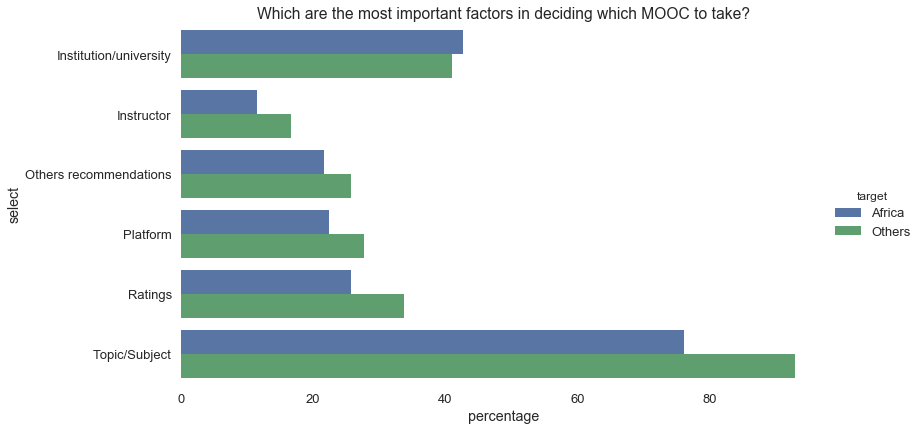

In [10]:
decisions = ['Decide: Topic/Subject', 'Decide: Instructor', 'Decide: Institution/university', 
             'Decide: Platform', 'Decide: Ratings', 'Decide: Others recommendations']
binary_compare_multi_select_categorical_barh(df, target=mask_africa, target_name='Africa',
                question='Which are the most important factors in deciding which MOOC to take?', 
                selectors=decisions)

{'Africa': 276, 'Others': 2215}
   target                                             select  percentage
0  Africa         Actively contributing to discussion forums   37.318841
1  Africa                         Browsing discussion forums   44.202899
2  Africa  Connecting with learners outside the course en...   23.550725
3  Africa  Connecting with other learners in the course e...   46.739130
4  Africa  Taking the course with other people you know (...   19.927536
5  Others         Actively contributing to discussion forums   29.571106
6  Others                         Browsing discussion forums   55.079007
7  Others  Connecting with learners outside the course en...   14.311512
8  Others  Connecting with other learners in the course e...   37.246050
9  Others  Taking the course with other people you know (...   14.582393


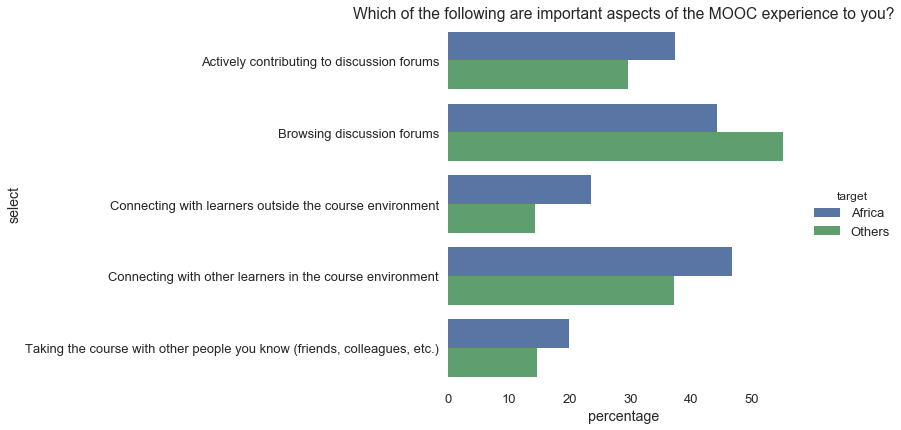

In [11]:
aspects = ['Aspects: Browsing discussion forums', 
           'Aspects: Actively contributing to discussion forums',
           'Aspects: Connecting with other learners in the course environment',
           'Aspects: Connecting with learners outside the course environment',
           'Aspects: Taking the course with other people you know (friends, colleagues, etc.)']
binary_compare_multi_select_categorical_barh(df, target=mask_africa, target_name='Africa',
                question='Which of the following are important aspects of the MOOC experience to you?', 
                selectors=aspects)

{'Africa': 276, 'Others': 2215}
    target                                        select  percentage
0   Africa                          Have not taken MOOCs   21.739130
1   Africa  Helped me get a new job in a different field    3.623188
2   Africa     Helped me get a new job in the same field    5.434783
3   Africa  Higher performance evaluation at current job   13.043478
4   Africa                                    Not Really   38.043478
5   Africa             Promotion at current organization    5.797101
6   Africa                School credit towards a degree    5.797101
7   Others                          Have not taken MOOCs   15.395034
8   Others  Helped me get a new job in a different field    4.334086
9   Others     Helped me get a new job in the same field    4.830700
10  Others  Higher performance evaluation at current job   11.196388
11  Others                                    Not Really   34.085779
12  Others             Promotion at current organization    2.573363
13

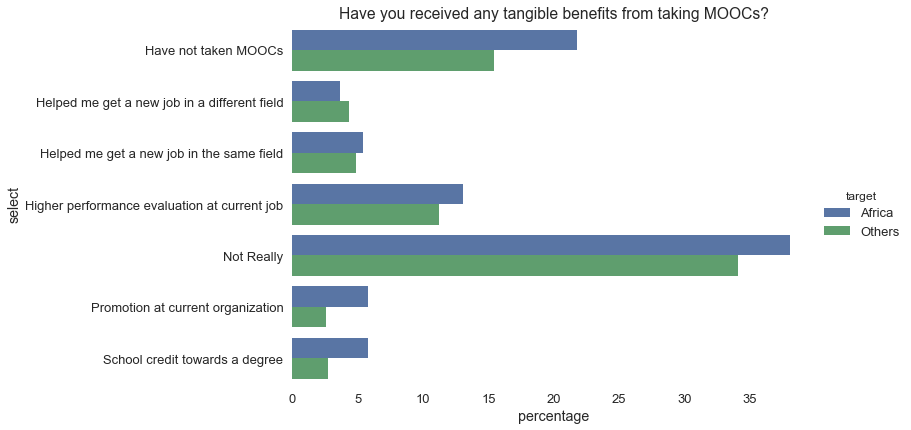

In [12]:
benefits = ['Benefit: Have not taken MOOCs', 
            'Benefit: Not Really',
            'Benefit: School credit towards a degree',
            'Benefit: Promotion at current organization',
            'Benefit: Higher performance evaluation at current job',
            'Benefit: Helped me get a new job in the same field',
            'Benefit: Helped me get a new job in a different field']
binary_compare_multi_select_categorical_barh(df, target=mask_africa, target_name='Africa',
                question='Have you received any tangible benefits from taking MOOCs?', 
                selectors=benefits)

{'Africa': 276, 'Others': 2215}
   target                                             select  percentage
0  Africa  A multi-course certification that the MOOC is ...   21.739130
1  Africa                       The MOOC platform being used   14.130435
2  Africa       The institution/university offering the MOOC   37.318841
3  Africa                           The instructor/professor    9.782609
4  Africa                                  The topic/subject   41.304348
5  Others  A multi-course certification that the MOOC is ...   24.920993
6  Others                       The MOOC platform being used   10.248307
7  Others       The institution/university offering the MOOC   40.135440
8  Others                           The instructor/professor   14.537246
9  Others                                  The topic/subject   47.178330


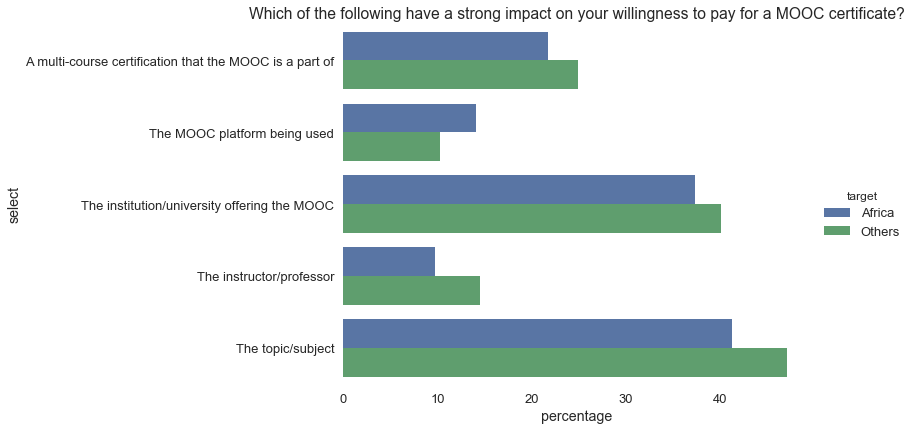

In [13]:
pays = ['Pay: The topic/subject',
        'Pay: The institution/university offering the MOOC',
        'Pay: The instructor/professor', 
        'Pay: The MOOC platform being used',
        'Pay: A multi-course certification that the MOOC is a part of']
binary_compare_multi_select_categorical_barh(df, target=mask_africa, target_name='Africa',
                question='Which of the following have a strong impact on your willingness to pay for a MOOC certificate?', 
                selectors=pays)

   answer visitor  percentage
0       0  Africa   44.202899
1       1  Africa   14.492754
2      15  Africa    3.985507
3     2.5  Africa   11.594203
4      25  Africa    4.710145
5     4.5  Africa    9.782609
6       8  Africa    6.521739
7       0   Other   24.650113
8       1   Other    9.074492
9      15   Other   10.112867
10    2.5   Other   16.388262
11     25   Other   11.106095
12    4.5   Other   12.821670
13      8   Other   14.085779


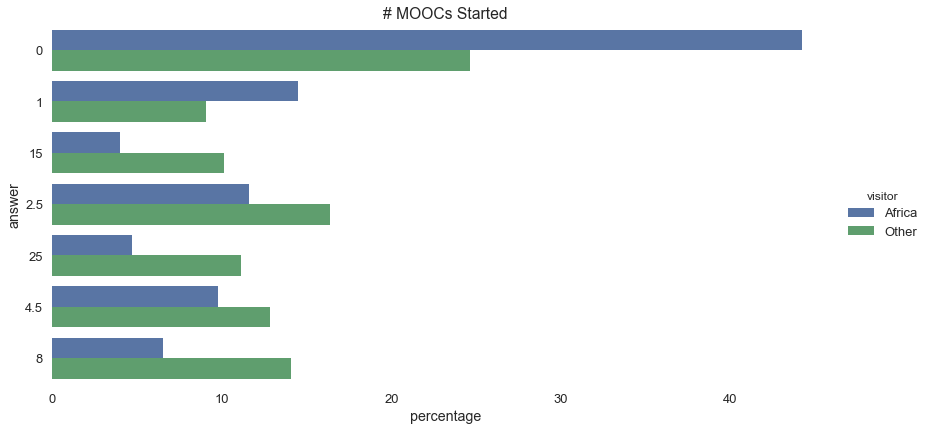

In [14]:
binary_compare_categorical_barh(mask=mask_africa, 
                                        target_name='Africa', feature='# MOOCs Started')

   answer visitor  percentage
0       0  Africa   54.710145
1       1  Africa    9.420290
2      15  Africa    2.173913
3     2.5  Africa   13.768116
4      25  Africa    1.449275
5     4.5  Africa    5.434783
6       8  Africa    5.072464
7       0   Other   34.537246
8       1   Other   12.415350
9      15   Other    5.643341
10    2.5   Other   17.923251
11     25   Other    6.094808
12    4.5   Other   11.738149
13      8   Other    8.397291


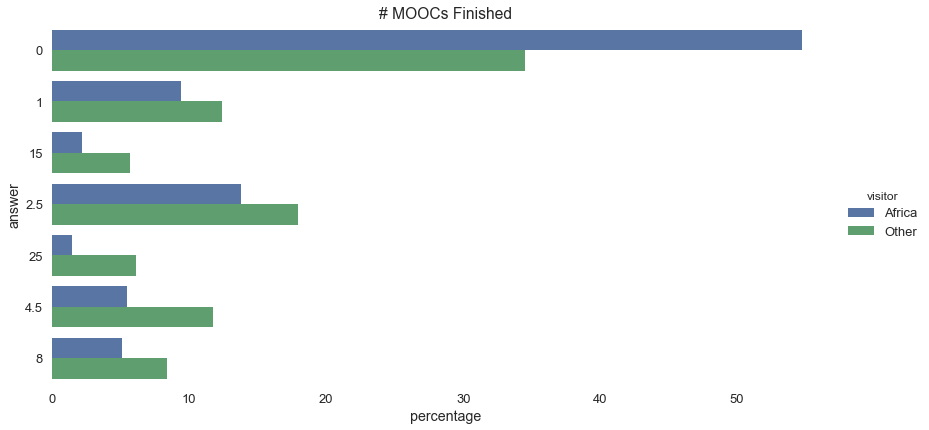

In [15]:
binary_compare_categorical_barh(mask=mask_africa, 
                                        target_name='Africa', feature='# MOOCs Finished')

                           answer visitor  percentage
0                   1-2 years ago  Africa   11.956522
1                    2+ years ago  Africa    9.420290
2          6 months to 1 year ago  Africa    8.333333
3  I have not taken any MOOCs yet  Africa   54.347826
4            Within past 6 months  Africa   14.130435
5                   1-2 years ago   Other   17.246050
6                    2+ years ago   Other   28.848758
7          6 months to 1 year ago   Other   10.564334
8  I have not taken any MOOCs yet   Other   26.997743
9            Within past 6 months   Other   15.801354


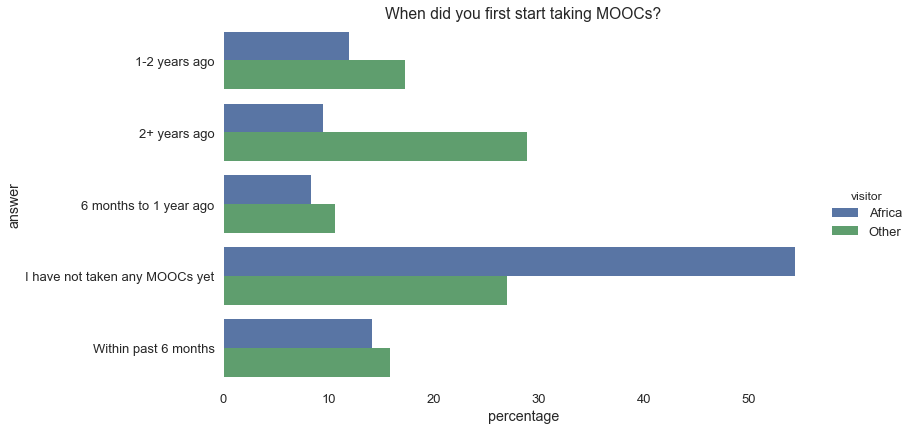

In [16]:
binary_compare_categorical_barh(mask=mask_africa, 
                                        target_name='Africa', feature='When did you first start taking MOOCs?')

They also started earlier with MOOCs

                         answer visitor  percentage
0                             1  Africa   21.376812
1                             2  Africa   18.478261
2                             3  Africa   21.739130
3                             4  Africa   11.594203
4                             5  Africa   21.014493
5   Generally not that willing.  Africa         NaN
6                             1   Other   27.720090
7                             2   Other   24.695260
8                             3   Other   27.494357
9                             4   Other   10.880361
10                            5   Other    6.591422
11  Generally not that willing.   Other    0.045147


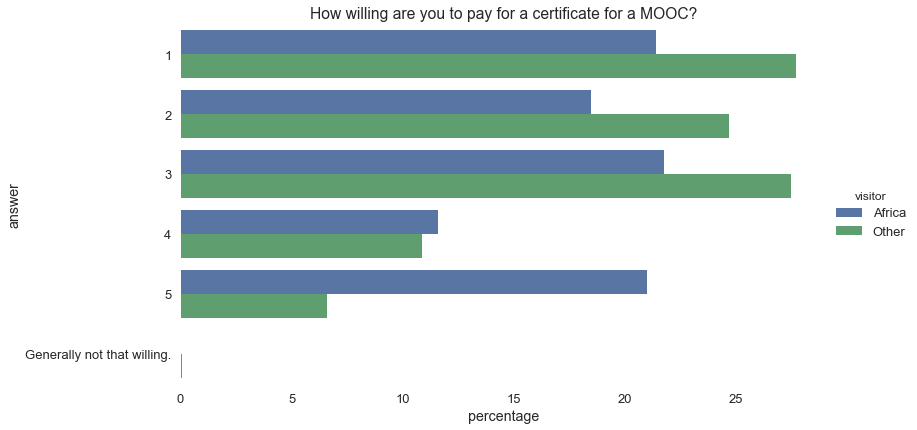

In [17]:
binary_compare_categorical_barh(mask=mask_africa, 
                                        target_name='Africa', feature='How willing are you to pay for a certificate for a MOOC?')

   answer visitor  percentage
0     1.0   Arica    6.159420
1     2.0   Arica   13.405797
2     3.0   Arica   25.362319
3     4.0   Arica   20.289855
4     5.0   Arica   29.710145
5     1.0   Other   10.203160
6     2.0   Other   20.225734
7     3.0   Other   39.142212
8     4.0   Other   16.839729
9     5.0   Other    8.848758


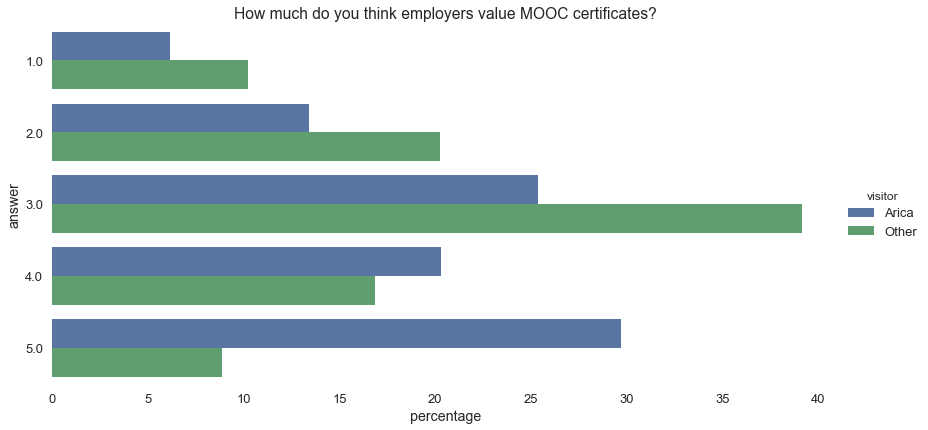

In [18]:
binary_compare_categorical_barh(mask=mask_africa, 
                                        target_name='Arica', 
                                        feature='How much do you think employers value MOOC certificates?')

                              answer visitor  percentage
0             Graduate school degree  Africa   37.681159
1         3 or 4 year college degree  Africa   26.449275
2                 High school degree  Africa   16.666667
3              2-year college degree  Africa    9.782609
4  Did not graduate from high school  Africa    7.608696
5             Graduate school degree   Other   44.920993
6         3 or 4 year college degree   Other   29.074492
7                 High school degree   Other   13.860045
8              2-year college degree   Other    7.720090
9  Did not graduate from high school   Other    2.889391


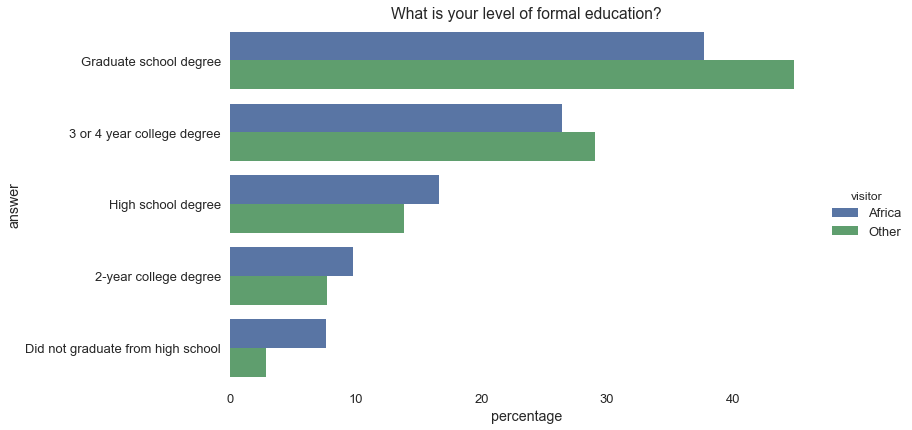

In [19]:
binary_compare_categorical_barh(mask=mask_africa, 
                                        target_name='Africa', 
                                        feature='What is your level of formal education?')

             answer visitor  percentage
0   10-17 years old  Africa    2.173913
1   18-21 years old  Africa   12.318841
2   22-25 years old  Africa   15.942029
3   26-29 years old  Africa   13.043478
4   30-35 years old  Africa   18.478261
5   36-45 years old  Africa   23.550725
6   46-55 years old  Africa    9.057971
7   56-65 years old  Africa    2.898551
8     66+ years old  Africa    1.811594
9   10-17 years old   Other    2.031603
10  18-21 years old   Other    6.410835
11  22-25 years old   Other    7.178330
12  26-29 years old   Other    7.358916
13  30-35 years old   Other    9.119639
14  36-45 years old   Other   16.027088
15  46-55 years old   Other   20.316027
16  56-65 years old   Other   17.787810
17    66+ years old   Other   12.641084


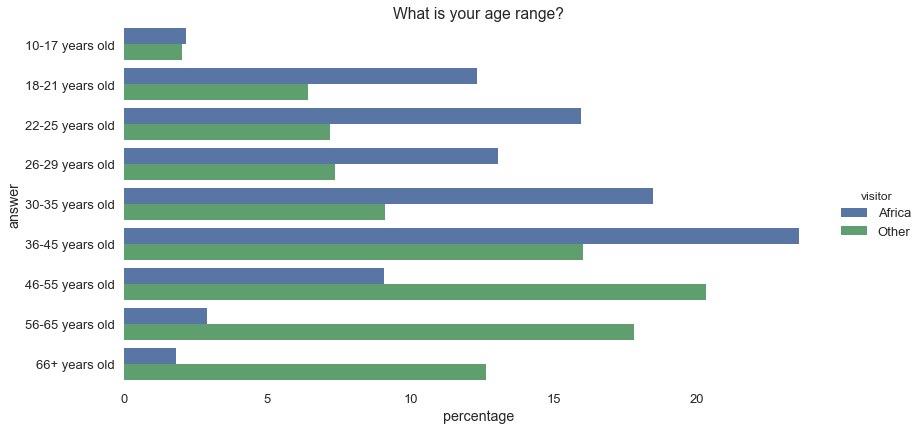

In [20]:
binary_compare_categorical_barh(mask=mask_africa, 
                                        target_name='Africa', 
                                        feature='What is your age range?')